# MLX90632 TOR  REPORT

General template info
Authors: CEG

Release: B, July ,2020

Template purpose
This file performs the postcalculation of the TOR data .  It shows the device parameter informatiron vs specifications and lists a go or not go statement according to the agreed quality norms. 

Revisions will be updated in the heading.

In [1]:
#CEG:  General import statements
%reset -f

import os
import glob
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
import tkinter as tk
from tkinter import filedialog
import seaborn as sns # set plot style
import probscale
import datetime
import time
import json
clear_bkgd = {'axes.facecolor':'none', 'figure.facecolor':'none'}
sns.set(style='ticks', context='talk', color_codes=True, rc=clear_bkgd)


In [2]:
os.chdir("\\Users\ceg\Documents\projects\90632\TOR\Automatic report\TOR-automatic-report-\data")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [3]:
#inputdata = pd.read_csv('tordata', sep=',', na_values=['', "?"])

datafile='combined_csv.csv'
#datafile1='1TD18764X2X3_Station1 Top_dm.csv'#inputdata['Datafile'].values[0]
#data_cols = ['station', 'inspection', 'recipe', 'lot', 'partid', 'key', 'value', 'result', 'unit', 'date_created', 'position', 'scanid', 'mintolerance', 'maxtolerance', 'toleranceusage', 'item', 'recipeid','pad_partid','pad_item','measurand_group_name', 'station_unique_id','inspectionstep','basicitemkey']

#CEG:  TOR Data
data = pd.read_csv(datafile, sep=',', na_values=['', "?"],  )
#sdata = pd.read_csv(datafile1, sep=',', na_values=['', "?"],  
data.head(3)


,station,inspection,recipe,lot,partid,key,value,result,unit,date_created,...,maxtolerance,toleranceusage,item,recipeid,pad_partid,pad_item,measurand_group_name,station_unique_id,inspectionstep,basicitemkey
0,Station1 Top,Orientation,SFN 3X3 5L,1TD15569BX1X1,1,MatchScore,93.77,Pass,Percent,2020-08-06 18:25:54,...,100.0,Low,Pattern 0°Pattern,NaN,NaN,NaN,MatchScore,e7ad9030-034e-43e1-be7d-2d35404aecee,Orientation,Pattern
1,Station1 Top,PackageLocate,SFN 3X3 5L,1TD15569BX1X1,1,Width,2977.30,Pass,Microns,2020-08-06 18:25:54,...,3100.0,Both,Package Package,NaN,NaN,NaN,Body Width,e7ad9030-034e-43e1-be7d-2d35404aecee,Package Locate,Package
2,Station1 Top,PackageLocate,SFN 3X3 5L,1TD15569BX1X1,1,Length,2982.40,Pass,Microns,2020-08-06 18:25:54,...,3100.0,Both,Package Package,NaN,NaN,NaN,Body Length,e7ad9030-034e-43e1-be7d-2d35404aecee,Package Locate,Package


# Lot information

In [4]:
outliers = []
def detect_outliers(data):
    
    treshhold=8
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i - mean)/std
        if np.abs(z_score)<treshhold:
            outliers.append(i)
    return outliers

   #                                                Top inspection

In [5]:

    #Yield statistic
topdata=data[(data["station"] == 'Station1 Top')]
now = datetime.datetime.today().strftime('%Y-%m-%d')
when=time.strftime('%H:%M:%S')

insp_parts= topdata.partid.nunique()
topdata[(topdata["result"] != 'Pass')]
failed=topdata[(topdata["result"] != 'Pass')].partid.nunique()
failednum=topdata[(topdata["result"] != 'Pass')].measurand_group_name.unique()


                                                                                 
                                                                                 
Data generated : 2020-08-25, 17:53:37
Data runned : 2020-08-06 18:25:54
                                                                                 
                                                                                 
Inspected parts = 23120
Fails = 3030
Top inspection yeld = 76.82
                                                                                 
                                                                                 
   Locator Pattern Score  Lens Diameter  Character Match Score  TopDistance  \
0                      3          14481                     31           64   

   BlobTotalAreaInPercent  BlobFeretX  BlobFeretY  Contact Shift Y  \
0                     631         750         971              538   

   Contact Shift X  HeatSink Shift X  HeatSink Shift Y  Body Width  \
0

Text(0, 0.5, 'Quantity')

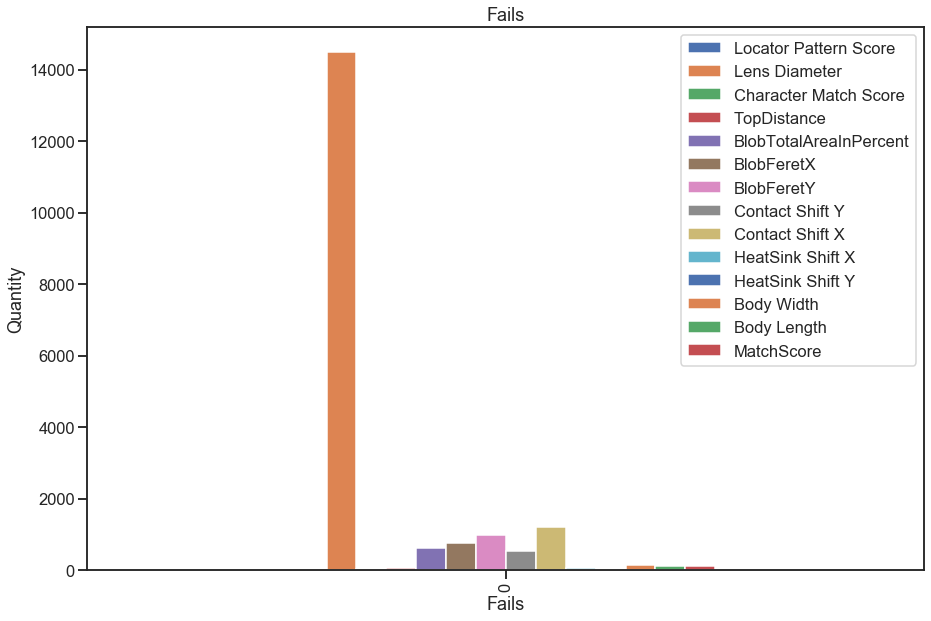

In [6]:

fails={}
for i in failednum :
    fail=topdata[(topdata["result"] != 'Pass')].measurand_group_name.str.count(i).sum()
    fails.update({(i):(fail)})



#print('Inspection : ' + topdata.station[1])
print( "                                                                                 ")
print( "                                                                                 ")
#print('Report for lot ' + topdata.lot[1] )
print('Data generated : '+ now +', '+ when)
print('Data runned : ' + str (topdata.date_created[1]))
print( "                                                                                 ")
print( "                                                                                 ")

print('Inspected parts = ' +  str(insp_parts ) )
print('Fails = ' +  str(failed ) )

yieldstat= ((insp_parts-failed)/ (insp_parts+failed))*100
print('Top inspection yeld = '  + str(yieldstat)[0:5])



print( "                                                                                 ")
print( "                                                                                 ")

df = pd.DataFrame(fails, index=[0])
print(df)
df.plot(kind="bar", figsize=(15,10));
pyplot.title("Fails")
pyplot.xlabel("Fails")
pyplot.ylabel("Quantity")



Lens diameter
![](img/lens_diameter.png)

count    287868.000000
mean        351.888973
std           8.362560
min          84.400000
25%         347.200000
50%         351.800000
75%         356.700000
max         636.400000
Name: value, dtype: float64


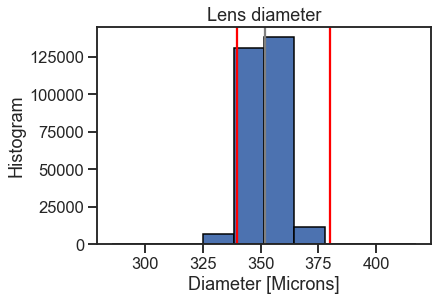

In [7]:
#Lens Diameter

topdata[(topdata['inspection'] == 'LensesLocate')   &  (topdata["item"] == 'Contact Ball A1') | (topdata["item"] == 'Contact Ball B1') | (topdata["item"] == 'Contact Ball B2') | (topdata["item"] == 'Contact Ball A4')  ]
print(topdata[(topdata['key'] == 'Diameter')].value.describe())

#topdata[(topdata['key'] == 'Diameter')].value
#detect_outliers(topdata.value)
#topdata[(topdata['key'] == 'Diameter')].value
bins= [330,340,345,350,355,360, 365,370,380 ]
#pyplot.hist(tordata[(tordata['key'] == 'Diameter')].value, bins=bins, edgecolor='black' )
pyplot.hist(detect_outliers(topdata[(topdata['key'] == 'Diameter')].value), bins=10, edgecolor='black')
pyplot.title('Lens diameter')
pyplot.ylabel('Histogram')
pyplot.xlabel('Diameter [Microns]');
pyplot.axvline(x=340,color='red')
pyplot.axvline(x=380,color='red')
pyplot.axvline(x=(np.mean((topdata[(topdata['key'] == 'Diameter')].value))),color='gray')
pyplot.show()


Lens shift
![](img/lens_shift.png)

count    359931.000000
mean         19.873043
std          17.131155
min        -369.500000
25%           5.700000
50%          21.300000
75%          31.300000
max         183.000000
Name: value, dtype: float64


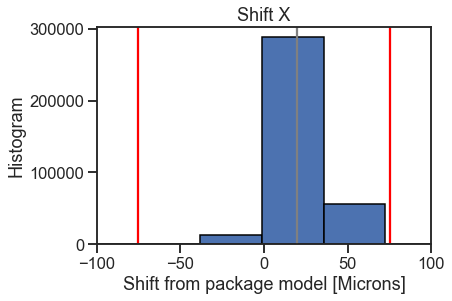

In [8]:

topdata[(topdata['inspection'] == 'LensesLocate')   &  (topdata["item"] == 'HeatSink HS1') ]
print(topdata[(topdata['key'] == 'ShiftX')].value.describe())

mean=np.mean(detect_outliers(topdata[(topdata['key'] == 'ShiftX')].value))

topdata[(topdata['key'] == 'ShiftX')].value
pyplot.hist((topdata[(topdata['key'] == 'ShiftX')].value), bins=15, edgecolor='black',  )
pyplot.title('Shift X')
pyplot.ylabel('Histogram')
pyplot.xlabel('Shift from package model [Microns]');
pyplot.axvline(x=-75,color='red')
pyplot.axvline(x=75,color='red')
pyplot.axvline(x=(np.mean((topdata[(topdata['key'] == 'ShiftX')].value))),color='gray')
pyplot.xlim(-100, 100);
pyplot.show()

count    359931.000000
mean         15.294798
std          17.604136
min        -423.300000
25%          -0.300000
50%          14.200000
75%          27.700000
max         167.200000
Name: value, dtype: float64


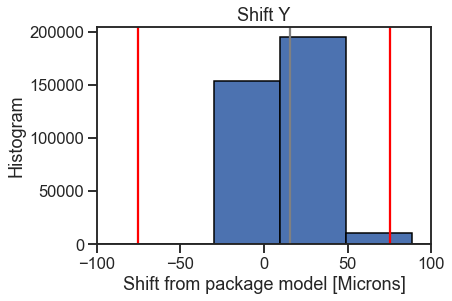

In [9]:

topdata[(topdata['inspection'] == 'LensesLocate')   &  (topdata["item"] == 'HeatSink HS1') ]
print(topdata[(topdata['key'] == 'ShiftY')].value.describe())

detect_outliers(topdata[(topdata['key'] == 'ShiftY')].value)

#topdata[(topdata['key'] == 'ShiftY')].value
pyplot.hist((topdata[(topdata['key'] == 'ShiftY')].value), bins=15, edgecolor='black' )
pyplot.title('Shift Y')
pyplot.ylabel('Histogram')
pyplot.xlabel('Shift from package model [Microns]');
pyplot.axvline(x=-75,color='red')
pyplot.axvline(x=75,color='red')
pyplot.axvline(x=(np.mean(topdata[(topdata['key'] == 'ShiftY')].value)),color='gray')
pyplot.xlim(-100, 100);

pyplot.show()

Window dimentions
![](img/window.png)

count    72063.000000
mean      2052.886982
std         22.648954
min       1918.300000
25%       2037.300000
50%       2053.700000
75%       2069.400000
max       2168.900000
Name: value, dtype: float64


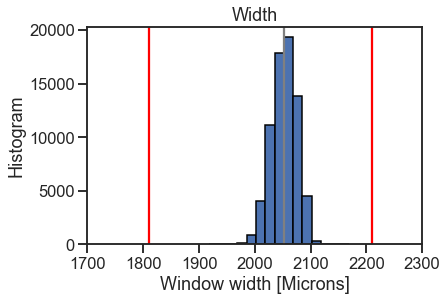

In [10]:

topdata[(topdata['inspection'] == 'LensesLocate')   &  (topdata["item"] == 'HeatSink HS1') ]
print(topdata[(topdata['key'] == 'Width')&  (topdata["item"] == 'HeatSink HS1') ].value.describe())

detect_outliers(topdata[(topdata['key'] == 'Width')&  (topdata["item"] == 'HeatSink HS1') ].value)

#topdata[(topdata['key'] == 'ShiftY')].value
pyplot.hist((topdata[(topdata['key'] == 'Width')&  (topdata["item"] == 'HeatSink HS1') ].value), bins=15, edgecolor='black' )
pyplot.title('Width')
pyplot.ylabel('Histogram')
pyplot.xlabel('Window width [Microns]');
pyplot.axvline(x=1810,color='red')
pyplot.axvline(x=2210,color='red')
pyplot.axvline(x=(np.mean(topdata[(topdata['key'] == 'Width')&  (topdata["item"] == 'HeatSink HS1') ].value)),color='gray')
pyplot.xlim(1700, 2300);

pyplot.show()

count    72063.000000
mean      1382.254357
std         18.527698
min       1287.100000
25%       1369.400000
50%       1383.800000
75%       1396.100000
max       1486.700000
Name: value, dtype: float64


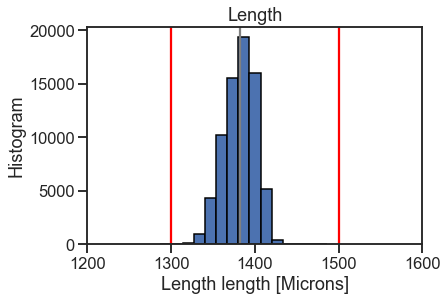

In [11]:

topdata[(topdata['inspection'] == 'LensesLocate')   &  (topdata["item"] == 'HeatSink HS1') ]
print(topdata[(topdata['key'] == 'Length')&  (topdata["item"] == 'HeatSink HS1') ].value.describe())

detect_outliers(topdata[(topdata['key'] == 'Length')&  (topdata["item"] == 'HeatSink HS1') ].value)

#topdata[(topdata['key'] == 'ShiftY')].value
pyplot.hist((topdata[(topdata['key'] == 'Length')&  (topdata["item"] == 'HeatSink HS1') ].value), bins=15, edgecolor='black' )
pyplot.title('Length')
pyplot.ylabel('Histogram')
pyplot.xlabel('Length length [Microns]');
pyplot.axvline(x=1300,color='red')
pyplot.axvline(x=1500,color='red')
pyplot.axvline(x=(np.mean(topdata[(topdata['key'] == 'Length')&  (topdata["item"] == 'HeatSink HS1') ].value)),color='gray')
pyplot.xlim(1200, 1600);

pyplot.show()

# 5s inspection


Package dimentions
![](img/package_dimentions.png)

count    72415.000000
mean      2984.030709
std         13.646668
min       2529.500000
25%       2980.600000
50%       2985.100000
75%       2989.400000
max       3016.300000
Name: value, dtype: float64


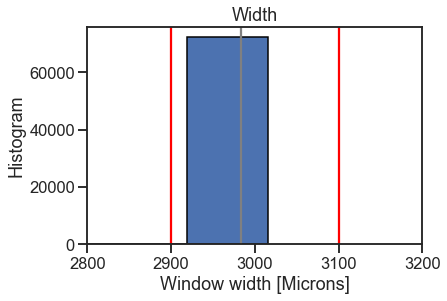

In [12]:

topdata[(topdata['inspection'] == 'PackageLocate')   &  (topdata["item"] == 'Package Package') ]
print(topdata[(topdata['key'] == 'Width')&  (topdata["item"] == 'Package Package') ].value.describe())

detect_outliers(topdata[(topdata['key'] == 'Width')&  (topdata["item"] == 'Package Package') ].value)

#topdata[(topdata['key'] == 'ShiftY')].value
pyplot.hist((topdata[(topdata['key'] == 'Width')&  (topdata["item"] == 'Package Package') ].value), bins=5, edgecolor='black' )
pyplot.title('Width')
pyplot.ylabel('Histogram')
pyplot.xlabel('Window width [Microns]');
pyplot.axvline(x=2900,color='red')
pyplot.axvline(x=3100,color='red')
pyplot.axvline(x=(np.mean(topdata[(topdata['key'] == 'Width')&  (topdata["item"] == 'Package Package') ].value)),color='gray')
pyplot.xlim(2800, 3200);

pyplot.show()

count    72415.000000
mean      2983.216847
std         14.273044
min       2699.100000
25%       2978.900000
50%       2985.000000
75%       2989.700000
max       3035.800000
Name: value, dtype: float64


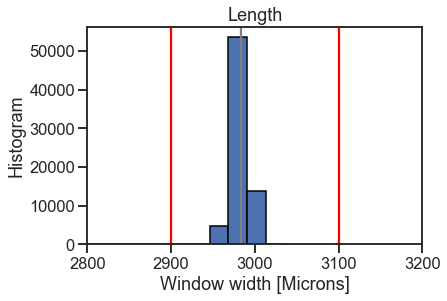

In [13]:

topdata[(topdata['inspection'] == 'PackageLocate')   &  (topdata["item"] == 'Package Package') ]
print(topdata[(topdata['key'] == 'Length')&  (topdata["item"] == 'Package Package') ].value.describe())

detect_outliers(topdata[(topdata['key'] == 'Length')&  (topdata["item"] == 'Package Package') ].value)

#topdata[(topdata['key'] == 'ShiftY')].value
pyplot.hist((topdata[(topdata['key'] == 'Length')&  (topdata["item"] == 'Package Package') ].value), bins=15, edgecolor='black' )
pyplot.title('Length')
pyplot.ylabel('Histogram')
pyplot.xlabel('Window width [Microns]');
pyplot.axvline(x=2900,color='red')
pyplot.axvline(x=3100,color='red')
pyplot.axvline(x=(np.mean(topdata[(topdata['key'] == 'Length')&  (topdata["item"] == 'Package Package') ].value)),color='gray')
pyplot.xlim(2800, 3200);

pyplot.show()

In [14]:
#outputstring='1TD15569X1X1X2X1_Station1'
#!jupyter nbconvert TOR.ipynb --execute --TemplateExporter.exclude_input=True --output=$outputstring
